## Step 1: 簡単なデータ可視化アシスタントを作る
ユーザーがCSVをアップロード
AIがデータを読み取り、特徴を要約
ユーザーの指示に応じて、適切な可視化（ヒストグラム、散布図、折れ線グラフなど）を提案・実行
使用技術:

pandas（データ処理）
matplotlib（可視化）
openai API or llama.cpp（質問応答）

In [2]:
!pip install openai pandas matplotlib seaborn

下のブロックを実行する前にkaggleからAPIキー(jsonファイル)を取得し、colabにアップロード

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
abdulmalik1518/mobiles-dataset-2025                               Mobiles Dataset (2025)                             20KB  2025-02-18 06:50:24           9673        175  1.0              
atharvasoundankar/chocolate-sales                                 Chocolate Sales Data 📊🍫                            63KB  2025-03-07 05:44:03           2747         36  1.0              
ignacioazua/life-expectancy                                       Life Expectancy                                     3KB  2025-03-04 06:16:35           1147         27  1.0              
mahmoudelhemaly/students-grading-dataset                    

In [2]:
!kaggle datasets download yasserh/wine-quality-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset
License(s): CC0-1.0
  0% 0.00/21.5k [00:00<?, ?B/s]
100% 21.5k/21.5k [00:00<00:00, 23.0MB/s]


In [4]:
!unzip /content/wine-quality-dataset.zip

Archive:  /content/wine-quality-dataset.zip
  inflating: WineQT.csv              


In [5]:
import pandas as pd
import os
from google.colab import files

# ユーザーの選択（1: アップロード, 2: フォルダ内のCSVを参照）
choice = input("データ取得方法を選択してください（1: アップロード, 2: フォルダ内のCSVを使用）: ")

if choice == "1":
    print("CSVファイルをアップロードしてください。")
    uploaded = files.upload()
    filename = list(uploaded.keys())[0]

elif choice == "2":
    folder_path = "/content/data"
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # フォルダ内のCSVファイル一覧を取得
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    if len(csv_files) == 0:
        print("フォルダ内にCSVファイルが見つかりません。")
    else:
        print("フォルダ内のCSVファイル:", csv_files)
        filename = os.path.join(folder_path, csv_files[0])  # 最初のCSVを選択

else:
    print("無効な選択肢です。1 または 2 を入力してください。")
    filename = None

# ファイルが選択されていればデータを読み込む
if filename:
    df = pd.read_csv(filename)
    print(f"読み込んだデータ: {filename}")
    print(df.head())  # 先頭5行を表示


データ取得方法を選択してください（1: アップロード, 2: フォルダ内のCSVを使用）: 2
フォルダ内のCSVファイル: ['WineQT.csv']
読み込んだデータ: /content/data/WineQT.csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0

In [6]:
# データの基本情報
df.info()

# 基本統計量
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


※OpenAI APIキーが必要（無料枠あり）
APIキーは https://platform.openai.com/ で取得

In [7]:
!pip install openai

In [12]:
import openai

openai.api_key = "APIキー"  # ここにAPIキーを設定

# データの基本情報を取得
data_summary = df.describe().to_string()

# AIに要約と可視化の提案を依頼
prompt = f"""
以下のデータの統計情報から、特徴を要約し、適切な可視化手法を提案してください。
データの統計情報:
{data_summary}
"""

response = openai.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": prompt}]
)

# AIの応答を表示
print(response.choices[0].message.content)


特徴要約:
このデータセットはワインの構成要素に関する情報と品質評価を含んでおり、各変数の平均やばらつき、最小値、最大値、四分位数などが示されています。特に、残留糖やクロライドなどの化学的性質、そして自由二酸化硫黄や総二酸化硫黄などの酸化還元性物質が含まれています。

可視化手法の提案:
1. ヒストグラム: 品質(Quality)やアルコール度数(Alcohol)の分布を視覚化するために使用できます。
2. 箱ひげ図: 各変数の分布と外れ値を視覚化するために使用できます。
3. 散布図: 品質とアルコール度数の関係を表現する際に使用できます。
4. 相関行列ヒートマップ: 各変数間の相関関係を表現する際に使用できます。

これらの可視化手法を使用して、データセットの特徴や相関関係を視覚的に理解することができます。


提案までしてコードを自動生成させる

In [13]:
import openai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files

# OpenAI APIキー
openai.api_key = "APIキー"  # ここにAPIキーを設定

# データの取得方法を選択
choice = input("データ取得方法を選択してください（1: アップロード, 2: フォルダ内のCSVを使用）: ")

if choice == "1":
    print("CSVファイルをアップロードしてください。")
    uploaded = files.upload()  # ファイルアップロード
    filename = list(uploaded.keys())[0]  # アップロードされたファイル名を取得

elif choice == "2":
    folder_path = "/content/data"  # 例：Colab内の'data'フォルダ
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)  # フォルダがなければ作成

    # フォルダ内のCSVファイル一覧を取得
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    if len(csv_files) == 0:
        print("フォルダ内にCSVファイルが見つかりません。")
    else:
        print("フォルダ内のCSVファイル:", csv_files)
        filename = os.path.join(folder_path, csv_files[0])  # 最初のCSVを選択

else:
    print("無効な選択肢です。1 または 2 を入力してください。")
    filename = None

# CSVファイルを読み込む
if filename:
    df = pd.read_csv(filename)
    print(f"読み込んだデータ: {filename}")
    print(df.head())  # 先頭5行を表示

    # データの統計情報
    data_summary = df.describe().to_string()

    # AIに可視化の提案を依頼
    prompt = f"""
    以下のデータの統計情報を元に、適切な可視化手法を提案し、それをPythonのコードとして記述してください。
    可能な場合はmatplotlibまたはseabornを使用してください。

    データの統計情報:
    {data_summary}
    """

    response = openai.chat.completions.create(
        model="gpt-4o-mini",  # 可能ならgpt-4-turbo, 無理ならgpt-3.5-turbo
        messages=[{"role": "user", "content": prompt}]
    )

    # AIの提案したコードを抽出
    code_block = response.choices[0].message.content
    print("\n=== AIの提案したコード ===\n")
    print(code_block)

データ取得方法を選択してください（1: アップロード, 2: フォルダ内のCSVを使用）: 2
フォルダ内のCSVファイル: ['WineQT.csv']
読み込んだデータ: /content/data/WineQT.csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0

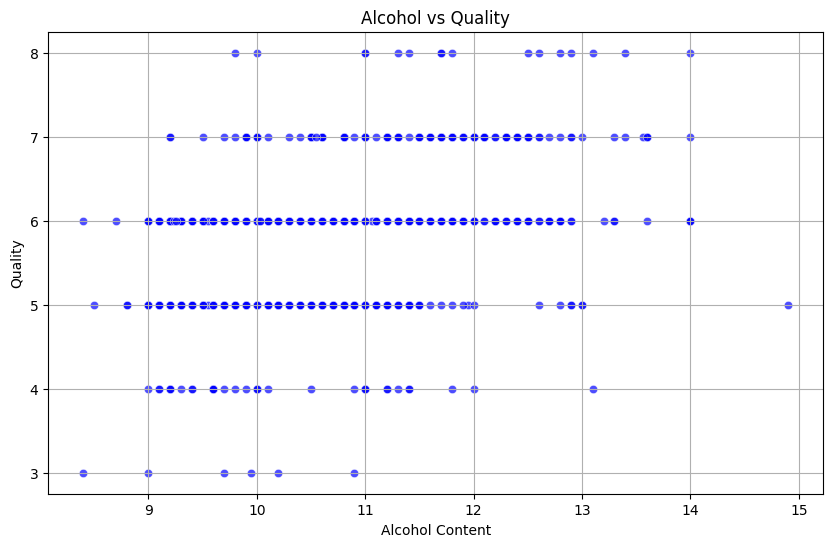

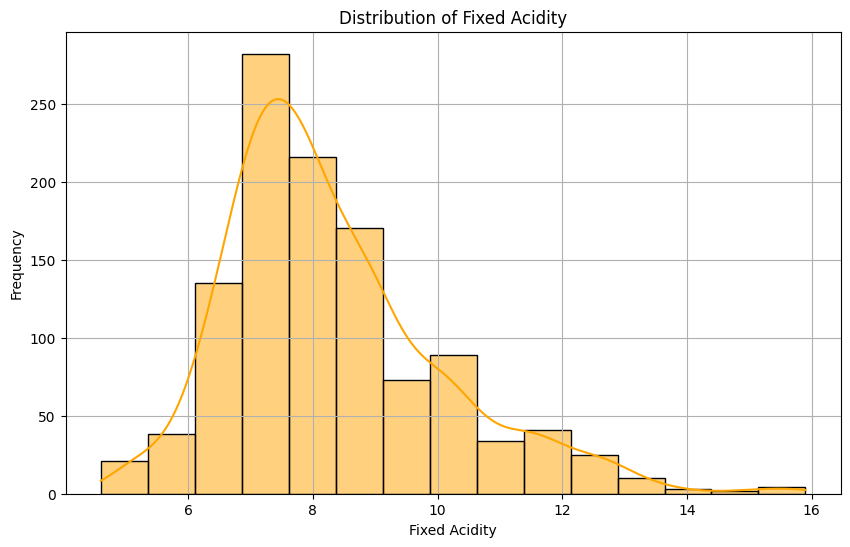

<ipython-input-14-d50040161498>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='quality', y='volatile acidity', palette='Set3')


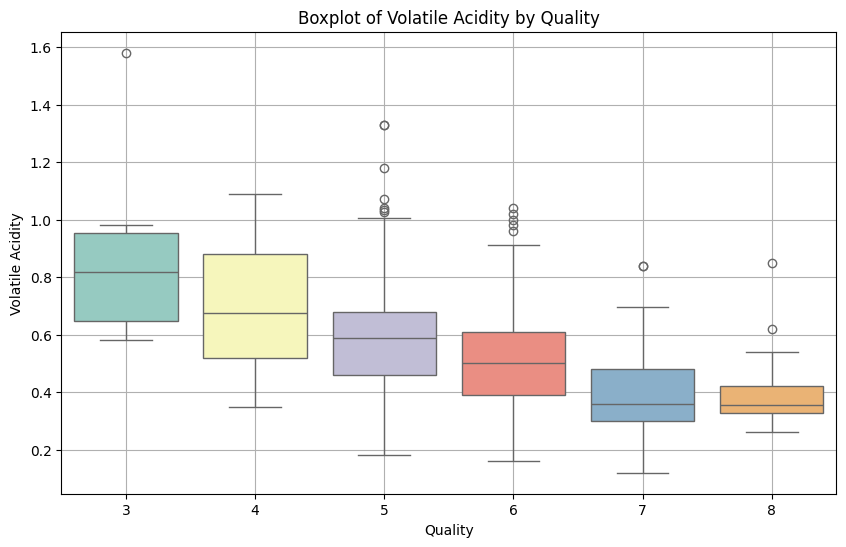

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df

# 1. 散布図：アルコール度数 vs 品質
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='quality', color='blue', alpha=0.7)
plt.title('Alcohol vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.grid(True)
plt.show()

# 2. ヒストグラム：固定酸の分布
plt.figure(figsize=(10, 6))
sns.histplot(df['fixed acidity'], bins=15, kde=True, color='orange')
plt.title('Distribution of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. 箱ひげ図：品質ごとの揮発酸の分布
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='quality', y='volatile acidity', palette='Set3')
plt.title('Boxplot of Volatile Acidity by Quality')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.grid(True)
plt.show()